# Social Data Analysis and Visualization 2023

### Final Project Explainer notebook _ Exploring Patterns of Motor Vehicle Collision Crash Data NYC (2018-2022)

#### 12 May , 2023

#### Team
- Sulaiman Kasas s195462
- Mohamad Malaz Mohamed Alzarrad s180424
- Bashar Khaled Bdewi s183356

### Contexts
- Motivation
- Basic stats
- Data Analysis
- Genre
- Visualizations
- Discussion
- Contributions
- References

# 1. Motivation

### A. Our dataset

Motor Vehicle Collision Crash Data NYC

The Motor Vehicle Collisions data contains the details of the crash event split by 5 boroughs of NYC. In the event of crash, the police department records the information by filling out a police report (MV104-AN) in the cases where someone is killed, injured or the damage is more than 1000$ worth.

We have chosen a five-year window (2018-2022) to study the components, capturing the most recent trends, and leaving out the data for 2023 as it is an ongoing year and therefore, we don’t have the complete data.


### B. Why did we choose this particular dataset?

Automobile accidents pose a serious threat to public health all over the world. Accidents involving motor vehicles can be attributed to a wide range of causes, such as human error, mechanical failure, poor infrastructure, and natural disasters. In 2016, road traffic injuries were responsible for an estimated 1.35 million deaths globally, as reported by the World Health Organization (WHO). In other words, on average, one person is killed every 26 seconds.


Accident data analysis provides valuable information to law enforcement organizations, allowing them to better allocate resources and create more effective traffic enforcement and education initiatives. Additionally, insurance firms can more accurately price policies for motorists by studying data on auto accidents.


### C. Our goal for the end user's experience

- Injuries, fatalities, and economic losses due to road traffic accidents continue to be a global public health problem despite efforts to reduce them. New obstacles occur as advances in transportation infrastructure, vehicle engineering, and population dynamics provide fresh challenges.
- Vehicle accidents can be caused by a wide variety of variables, and in order to reduce their occurrence, it is essential to analyze these incidents.


- By combining data visualization with basic statistical analysis, our team will create a foundational model that can shed light on the problem, guide efforts to reduce the number of accidents, and even be used to help prepare machine learning algorithms.
- Using an Exploratory Data Analysis, we are trying to identify the key factors, timings, locations, vehicle types influencing the collisions and crashes. 



# 2. Basic stats

A. Data preprocessing


B. Preliminary Data Visualizations


C. Data Cleaning 



### A. Data preprocessing
We would like to perform the following operations on a dataset:

1. Filter the data for the last five years (2018-2022).
2. Transform the columns into their appropriate data types.
3. Check for null values.
4. List the null rows for a specific column.
5. Check the number of unique values in the 'COLLISION_ID' column.
6. Generate descriptive statistics.

By performing these operations, we will be able to clean and analyze the dataset effectively.


In [56]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [57]:
# Import and read the first few rows of the dataset
Crash = pd.read_csv(r"Motor_Vehicle_Collisions.csv", low_memory=False)

# Obtaining an overview of the data
Crash.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [58]:
# Obtaining an overview of the data the last 5 rows in the dataframe

Crash.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1989002,05/01/2023,14:25,BROOKLYN,11226,40.647728,-73.958145,"(40.647728, -73.958145)",NaN,NaN,973 FLATBUSH AVENUE,...,Unspecified,NaN,NaN,NaN,4625801,Sedan,Bike,NaN,NaN,NaN
1989003,04/26/2023,11:10,MANHATTAN,10001,40.749670,-73.995310,"(40.74967, -73.99531)",WEST 30 STREET,8 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4625607,Box Truck,Sedan,NaN,NaN,NaN
1989004,04/27/2023,19:15,NaN,NaN,40.758427,-73.992640,"(40.758427, -73.99264)",9 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4625614,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1989005,04/29/2023,21:56,QUEENS,11423,40.712006,-73.758110,"(40.712006, -73.75811)",202 STREET,99 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4625629,NaN,NaN,NaN,NaN,NaN
1989006,05/01/2023,12:22,BROOKLYN,11224,40.576744,-73.983720,"(40.576744, -73.98372)",WEST 16 STREET,MERMAID AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4625263,Bus,Ambulance,NaN,NaN,NaN


In [59]:
#Getting information about each column

Crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989007 entries, 0 to 1989006
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [60]:
# Check the shape of the dataframe (No. of rows and columns)

Crash.shape

(1989007, 29)

In [61]:
# Convert Crash date to datetime format
Crash['CRASH DATE'] = pd.to_datetime(Crash['CRASH DATE'])

# Extract Year information from crash date and create a new column "CRASH YEAR"
Crash['CRASH YEAR'] = Crash['CRASH DATE'].dt.year

# Create a new column "CRASH MONTH" from 'CRASH DATE'
Crash['CRASH MONTH'] = Crash['CRASH DATE'].dt.month
Crash.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH YEAR,CRASH MONTH
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,9
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022,3
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022,6
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,2021,9
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,2021,12


In [62]:
# Filtering the data for last five years (2018-2022)

Crash_filtered_by_year = Crash[(Crash['CRASH YEAR'] >= 2018) & (Crash['CRASH YEAR'] <= 2022)]
Crash_filtered_by_year.shape

(770313, 31)

In [63]:
# Transform the columns into their appropriate data types

Crash_filtered_by_year['CRASH DATE'] = pd.to_datetime(Crash_filtered_by_year['CRASH DATE'])
Crash_filtered_by_year['COLLISION_ID'] = Crash_filtered_by_year['COLLISION_ID'].astype(str)

Crash_filtered_by_year.info()

C:\Users\Sulai\AppData\Local\Temp\ipykernel_7460\3173850486.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sulai\AppData\Local\Temp\ipykernel_7460\3173850486.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 770313 entries, 0 to 1988694
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     770313 non-null  datetime64[ns]
 1   CRASH TIME                     770313 non-null  object        
 2   BOROUGH                        500893 non-null  object        
 3   ZIP CODE                       500774 non-null  object        
 4   LATITUDE                       711182 non-null  float64       
 5   LONGITUDE                      711182 non-null  float64       
 6   LOCATION                       711182 non-null  object        
 7   ON STREET NAME                 576119 non-null  object        
 8   CROSS STREET NAME              372264 non-null  object        
 9   OFF STREET NAME                193450 non-null  object        
 10  NUMBER OF PERSONS INJURED      770307 non-null  float64       
 11 

In [64]:
# Check the index

Crash_filtered_by_year.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1986516, 1986696, 1986697, 1986867, 1987400, 1987646, 1988355,
            1988380, 1988429, 1988694],
           dtype='int64', length=770313)

In [65]:
#Check the null values

Crash_filtered_by_year.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          269420
ZIP CODE                         269539
LATITUDE                          59131
LONGITUDE                         59131
LOCATION                          59131
ON STREET NAME                   194194
CROSS STREET NAME                398049
OFF STREET NAME                  576863
NUMBER OF PERSONS INJURED             6
NUMBER OF PERSONS KILLED             14
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      3061
CONTRIBUTING FACTOR VEHICLE 2    142179
CONTRIBUTING FACTOR VEHICLE 3    709504
CONTRIBUTING FACTOR VEHICLE 4    755627
CONTRIBUTING FACTOR VEHICLE 5    766117
COLLISION_ID                          0
VEHICLE TYPE CODE 1                6584


In [66]:
# Listing the Null rows for a column 

Null_rows = Crash_filtered_by_year['NUMBER OF PERSONS INJURED'].isnull()
print(Crash_filtered_by_year[Null_rows])

       CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
182084 2021-01-28      10:10       NaN      NaN  40.866600 -73.895454   
569239 2018-09-30       6:30    QUEENS    11368  40.749767 -73.863810   
618622 2018-07-23      12:50  BROOKLYN    11221  40.686030 -73.932680   
668657 2018-05-16       8:00       NaN      NaN        NaN        NaN   
711770 2018-02-01      16:08    QUEENS    11369  40.759315 -73.862200   
728423 2018-01-05      15:00     BRONX    10465  40.822437 -73.837040   

                      LOCATION                    ON STREET NAME  \
182084   (40.8666, -73.895454)  EAST KINGSBRIDGE ROAD              
569239  (40.749767, -73.86381)                               NaN   
618622   (40.68603, -73.93268)  STUYVESANT AVENUE                  
668657                     NaN                               NaN   
711770   (40.759315, -73.8622)                               NaN   
728423  (40.822437, -73.83704)                               NaN   

       CROS

In [67]:
# Check the number of unique values in the colummn 'COLLISION_ID'

Crash_filtered_by_year["COLLISION_ID"].nunique()

770313

In [68]:
# Generating descriptive statistics

Crash_filtered_by_year.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CRASH YEAR,CRASH MONTH
count,711182.000000,711182.000000,770307.000000,770299.000000,770313.000000,770313.000000,770313.000000,770313.00000,770313.000000,770313.000000,770313.000000,770313.000000
mean,40.525513,-73.559689,0.352606,0.001720,0.058220,0.000802,0.032809,0.00014,0.255671,0.000736,2019.537245,6.528843
std,2.847030,5.247851,0.723525,0.043037,0.245283,0.028541,0.180970,0.01184,0.688021,0.029151,1.394761,3.426787
min,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2018.000000,1.000000
25%,40.667084,-73.967026,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2018.000000,4.000000
50%,40.718520,-73.920730,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2019.000000,7.000000
75%,40.776356,-73.863330,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2021.000000,9.000000
max,41.124210,0.000000,40.000000,4.000000,7.000000,2.000000,3.000000,1.00000,40.000000,4.000000,2022.000000,12.000000


### B. Preliminary Data Visualizations
To focus on important insights, we can create bar charts that compare different aspects of the data. Here are some ideas for bar charts we will create:


1. Visualizing the number of crashes by month and year for the period of 2018-2022.
2. Visualizing the number of injuries by year for the period of 2018-2022.
3. Visualizing the number of crashes by boroughs of NYC and by year for the period of 2018-2022.


##### Bar Chart  _ Number of Crashes by Month and Year (2018-2022)

C:\Users\Sulai\AppData\Local\Temp\ipykernel_7460\4273073527.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



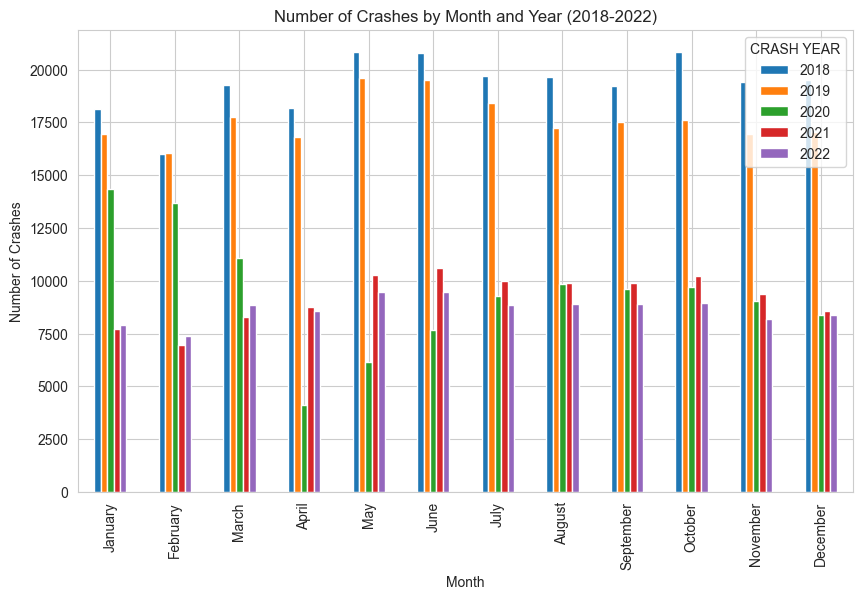

In [69]:
# Create a new column "CRASH MONTH" to extract month information from CRASH DATE
Crash_filtered_by_year.loc[:, "CRASH MONTH"] = Crash_filtered_by_year["CRASH DATE"].dt.month_name()

# Group the data by year and month and count the number of occurrences
crash_year_month_count = Crash_filtered_by_year.groupby(["CRASH YEAR", "CRASH MONTH"]).size().reset_index(name="Counts")

# Pivot the data to create a year x month matrix
crash_year_month_pivot = crash_year_month_count.pivot(index="CRASH MONTH", columns="CRASH YEAR", values="Counts")

# Reorder the rows by month name
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
crash_year_month_pivot = crash_year_month_pivot.reindex(month_names)

# Create a bar chart of the number of crashes by month and year
crash_year_month_pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Crashes by Month and Year (2018-2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.show()

Overall, a bar chart is created to visualize the number of crashes by month and year for the period of 2018-2022. 

The chart shows a declining trend in the number of crashes from 2018 to 2022, with a drastic decline starting in 2020, possibly due to COVID-19 lockdowns. 

The trend is similar for all months, and the number of crashes has been nearly halved over the five-year period.

#### Bar Chart  _ Number of Injuries by Year (2018-2022)

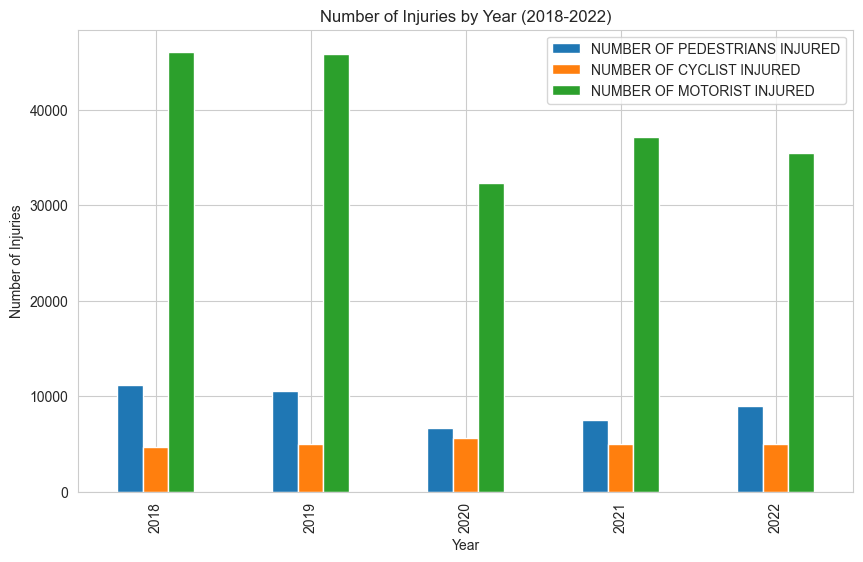

In [70]:
# Create a new DataFrame with columns for the number of persons injured, pedestrians injured, cyclists injured, and motorists injured, grouped by year
injury_counts = Crash_filtered_by_year.groupby('CRASH YEAR')[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum()

# Create a bar chart of the number of injuries by year
injury_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Injuries by Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.show()

Based on the bar chart, the highest number of injured persons is observed in the motorist category, which is close to 48,000 for the years 2018 and 2019. The trend for cyclists remains below 10,000 and has been constant across all the years.

#### Stacked Bar Chart  _ Number of Crashes in NYC by City and Year (2018-2022)

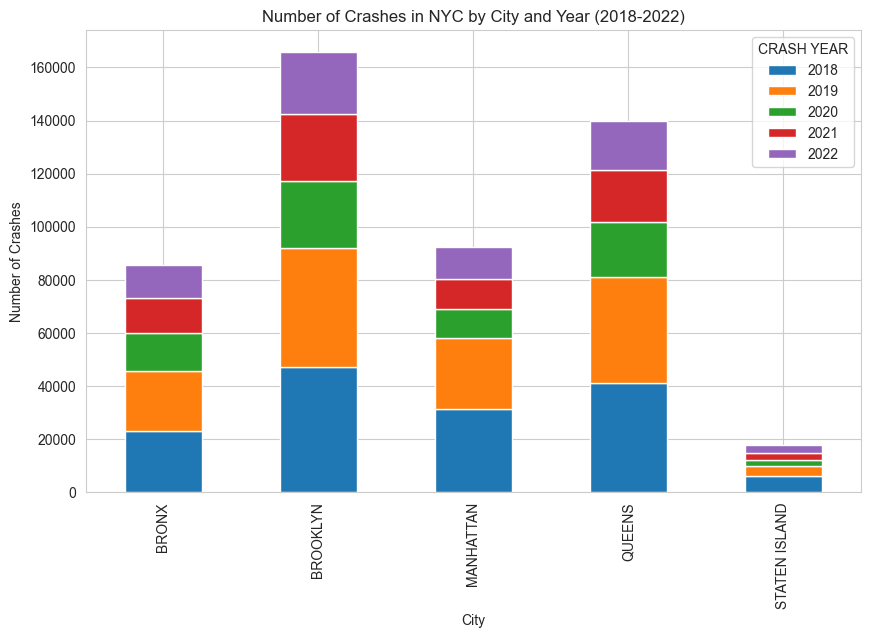

In [71]:
# Replaced null values in the "BOROUGH" column with "NA"
#Crash_filtered_by_year.loc[:, "BOROUGH"] = Crash_filtered_by_year["BOROUGH"].fillna("NA")

# Group the data by city and year and count the number of occurrences
crash_city_year_count = Crash_filtered_by_year.groupby(["BOROUGH", "CRASH YEAR"]).size().reset_index(name="Counts")

# Pivot the data to create a city x year matrix
crash_city_year_pivot = crash_city_year_count.pivot(index="BOROUGH", columns="CRASH YEAR", values="Counts")

# Create a stacked bar chart of the number of crashes by city and year
crash_city_year_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Number of Crashes in NYC by City and Year (2018-2022)")
plt.xlabel("City")
plt.ylabel("Number of Crashes")
plt.show()




In [72]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd

# Assuming your crash_city_year_pivot dataframe is ready
# If not, recreate it using the code you provided

# Create a stacked bar chart of the number of crashes by city and year
fig = go.Figure()

years = crash_city_year_pivot.columns.tolist()
boroughs = crash_city_year_pivot.index.tolist()

for year in years:
    fig.add_trace(go.Bar(
        x=boroughs,
        y=crash_city_year_pivot[year].tolist(),
        name=str(year)
    ))

fig.update_layout(
    barmode="stack",
    title="Number of Crashes in NYC by City and Year (2018-2022)",
    xaxis_title="City",
    yaxis_title="Number of Crashes"
)

# Save the plot as an HTML file
pio.write_html(fig, file="crash_city_year.html", auto_open=True)

The resulting graph shows the number of crashes in each of the five boroughs of NYC. Brooklyn has the highest number of crashes, while Staten Island has the least. The number of crashes was higher in the years 2018 and 2019 for all boroughs and has declined in the later years.

However, this information may not be accurate due to the large number of NA values in the 'BOROUGH' column. To obtain more accurate results, the data should be cleansed to account for missing or invalid values.

While analyzing the number of crashes by borough, we can see almost 35% of values missing. To reduce the missing numbers, we are planning to use information from additional columns zip code, latitude, longitude and locations to get the exact location. In cases where the null values can’t be imputed using the above columns, and zero fatalities recorded, we plan to remove such rows as they don’t have much insight to offer.


In our preliminary analysis, we have taken a quick look of main features of data to identify incomplete records, outliers and data segments. In the upcoming submissions, we will try to analyze the contributing factors, their trends, relationships with each other and answer the analysis questions.


## C. Data Cleaning 
The data has been further processed and cleaned to improve its accuracy and fill in missing values. The following steps have been performed:


- Filtering out rows with no injuries or fatalities.

- Filling missing values using the count of motorist, cyclist, and pedestrians injured or killed.

- Replacing 0's with 'NA' for the columns 'Latitude' and 'Longitude'.

- Selecting all rows where BOROUGH, ZIP CODE, LATITUDE, and LONGITUDE are not blank.

- Importing an Excel mapping file to bring in additional location-related columns for analysis.

- Joining the two dataframes to incorporate the additional column from the Excel file.

- Importing an Excel mapping file to fill in missing locations.

- Using the Google Geocoding API to fill in missing locations using Latitude and Longitude information.

- Creating a new column, FINAL_BOROUGH, combining original and updated borough values.

- Counting the number of collisions occurrences by Borough.

- Creating a final cleaned dataframe, dropping unwanted columns.

- Ensuring the changes were committed.

- Saving a clean, formatted copy of the dataset to disk.

This comprehensive data cleaning process helps enhance the quality of the dataset, ensuring more accurate and reliable insights during analysis.

In [73]:
#Filtering out rows where there were no injuries or fatalities
no_injuries_or_fatalities = Crash_filtered_by_year.loc[(Crash_filtered_by_year['NUMBER OF PERSONS INJURED'] != 0) | (Crash_filtered_by_year['NUMBER OF PERSONS KILLED'] != 0)]
no_injuries_or_fatalities.shape
no_injuries_or_fatalities.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH YEAR,CRASH MONTH
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,September
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022,March
7,2021-12-14,8:17,BRONX,10475,40.86816,-73.83148,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,2021,December
14,2021-12-14,23:10,QUEENS,11434,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,...,NaN,NaN,4486635,Sedan,Sedan,NaN,NaN,NaN,2021,December
16,2021-12-14,20:03,BROOKLYN,11226,40.65068,-73.95881,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,...,NaN,NaN,4486991,Sedan,NaN,NaN,NaN,NaN,2021,December


In [74]:
#Filled the missing values using the count of motorist, cyclist and pedestrians injured or killed.

no_injuries_or_fatalities.loc[no_injuries_or_fatalities['NUMBER OF PERSONS INJURED'].isnull(), 'NUMBER OF PERSONS INJURED'] = no_injuries_or_fatalities['NUMBER OF PEDESTRIANS INJURED'] + no_injuries_or_fatalities['NUMBER OF CYCLIST INJURED'] + no_injuries_or_fatalities['NUMBER OF MOTORIST INJURED']
no_injuries_or_fatalities.loc[no_injuries_or_fatalities['NUMBER OF PERSONS KILLED'].isnull(), 'NUMBER OF PERSONS KILLED'] = no_injuries_or_fatalities['NUMBER OF PEDESTRIANS KILLED'] + no_injuries_or_fatalities['NUMBER OF CYCLIST KILLED'] + no_injuries_or_fatalities['NUMBER OF MOTORIST KILLED']


In [75]:
#Replaced 0's with 'NA' for the columns 'Latitude' and 'Longitude'

no_injuries_or_fatalities.loc[no_injuries_or_fatalities['LATITUDE'] == 0, 'LATITUDE'] = np.nan
no_injuries_or_fatalities.loc[no_injuries_or_fatalities['LONGITUDE'] == 0, 'LONGITUDE'] = np.nan

In [76]:
#Selected all the values where BOROUGH, ZIP CODE, LATITUDE and LONGITUDE are not blank.
no_injuries_or_fatalities = no_injuries_or_fatalities[~((no_injuries_or_fatalities['BOROUGH'].isnull()) & 
                                                        (no_injuries_or_fatalities['ZIP CODE'].isna()) & 
                                                        (no_injuries_or_fatalities['LATITUDE'].isna()) & 
                                                        (no_injuries_or_fatalities['LONGITUDE'].isna()))]


In [77]:
no_injuries_or_fatalities.shape

(189838, 31)

In [78]:
no_injuries_or_fatalities['WEEKDAY'] = no_injuries_or_fatalities['CRASH DATE'].dt.strftime('%A')

# display the first 10 rows of the DataFrame
print(no_injuries_or_fatalities.head(10))

   CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
7  2021-12-14       8:17          BRONX    10475  40.868160 -73.831480   
14 2021-12-14      23:10         QUEENS    11434  40.666840 -73.789410   
16 2021-12-14      20:03       BROOKLYN    11226  40.650680 -73.958810   
18 2021-12-11      19:43          BRONX    10463  40.872620 -73.904686   
21 2021-12-14       5:46            NaN      NaN  40.744644 -73.770410   
23 2021-12-14       3:43            NaN      NaN  40.804375 -73.937420   
24 2021-12-13      17:40  STATEN ISLAND    10301  40.631650 -74.087620   
25 2021-12-14      17:31       BROOKLYN    11230  40.623104 -73.958090   
27 2021-12-14      12:54       BROOKLYN    11217  40.687534 -73.977500   
28 2021-12-14      17:15       BROOKLYN    11211  40.710957 -73.951126   

                   LOCATION          ON STREET NAME   CROSS STREET NAME  \
7     (40.86816, -73.83148)                     NaN                 NaN   
14    (40.66684, -73.78941)    NORT

In [79]:
# Importing the excel mapping file to import the Groups
VehicleTypeMapping = pd.read_excel(r"VehicleTypeMapping.xlsx", sheet_name='Sheet1')
VehicleTypeMapping.head(10)

,VEHICLE TYPE CODE 1,Vehicle Group
0,BICYC,Bicycle
1,BICYCLE,Bicycle
2,Bike,Bicycle
3,Bus,Bus
4,MTA BUS,Bus
5,SCHOOL BUS,Bus
6,MTA B,Bus
7,Pass,Car (sedan/hatchback)
8,Toyota,Car (sedan/hatchback)
9,SELF,Car (sedan/hatchback)


In [80]:
# Joining the two dataframes and bringing in the additional column from excel file which will be used further for analysis
joined_df = pd.merge(no_injuries_or_fatalities, VehicleTypeMapping, on='VEHICLE TYPE CODE 1', how='left')
joined_df.shape

(189838, 33)

In [81]:
# Importing the excel mapping file to fill the missing locations
# We have used the Google Geocoding API to fill in the missing locations using the Latitude and Longitude information. 
  

LatLongLocationMapping = pd.read_excel(r"LatLong Original Mapping.xlsx", sheet_name='Final')
LatLongLocationMapping.head(10)

,LATITUDE,LONGITUDE,LOCATION,BOROUGH
0,40.744644,-73.770410,"(40.744644, -73.77041)",QUEENS
1,40.804375,-73.937420,"(40.804375, -73.93742)",MANHATTAN
2,40.784615,-73.953964,"(40.784615, -73.953964)",MANHATTAN
3,40.720535,-73.888850,"(40.720535, -73.88885)",QUEENS
4,40.607685,-74.138920,"(40.607685, -74.13892)",STATEN ISLAND
5,40.790276,-73.939600,"(40.790276, -73.9396)",MANHATTAN
6,40.638382,-74.036680,"(40.638382, -74.03668)",BROOKLYN
7,40.744800,-73.953415,"(40.7448, -73.953415)",QUEENS
8,40.749670,-73.995310,"(40.74967, -73.99531)",MANHATTAN
9,40.677940,-73.802300,"(40.67794, -73.8023)",QUEENS


In [82]:
joined_df_Boroughupdated = pd.merge(joined_df, LatLongLocationMapping, on='LOCATION', how='left')
joined_df_Boroughupdated.head()

,CRASH DATE,CRASH TIME,BOROUGH_x,ZIP CODE,LATITUDE_x,LONGITUDE_x,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH YEAR,CRASH MONTH,WEEKDAY,Vehicle Group,LATITUDE_y,LONGITUDE_y,BOROUGH_y
0,2021-12-14,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),NaN,NaN,NaN
1,2021-12-14,23:10,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,...,NaN,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),40.666840,-73.789410,QUEENS
2,2021-12-14,20:03,BROOKLYN,11226,40.650680,-73.958810,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,...,NaN,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),NaN,NaN,NaN
3,2021-12-11,19:43,BRONX,10463,40.872620,-73.904686,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE,NaN,...,NaN,NaN,NaN,2021,December,Saturday,Station Wagon/SUV,40.872620,-73.904686,BRONX
4,2021-12-14,5:46,NaN,NaN,40.744644,-73.770410,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,2021,December,Tuesday,Station Wagon/SUV,40.744644,-73.770410,QUEENS


In [83]:
# Create a new column named FINAL_BOROUGH that combines original and updated borough values
joined_df_Boroughupdated["FINAL_BOROUGH"] = joined_df_Boroughupdated["BOROUGH_x"].fillna(joined_df_Boroughupdated["BOROUGH_y"])
joined_df_Boroughupdated.head()

,CRASH DATE,CRASH TIME,BOROUGH_x,ZIP CODE,LATITUDE_x,LONGITUDE_x,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH YEAR,CRASH MONTH,WEEKDAY,Vehicle Group,LATITUDE_y,LONGITUDE_y,BOROUGH_y,FINAL_BOROUGH
0,2021-12-14,8:17,BRONX,10475,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),NaN,NaN,NaN,BRONX
1,2021-12-14,23:10,QUEENS,11434,40.666840,-73.789410,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,NaN,...,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),40.666840,-73.789410,QUEENS,QUEENS
2,2021-12-14,20:03,BROOKLYN,11226,40.650680,-73.958810,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,...,NaN,NaN,2021,December,Tuesday,Car (sedan/hatchback),NaN,NaN,NaN,BROOKLYN
3,2021-12-11,19:43,BRONX,10463,40.872620,-73.904686,"(40.87262, -73.904686)",WEST KINGSBRIDGE ROAD,HEATH AVENUE,NaN,...,NaN,NaN,2021,December,Saturday,Station Wagon/SUV,40.872620,-73.904686,BRONX,BRONX
4,2021-12-14,5:46,NaN,NaN,40.744644,-73.770410,"(40.744644, -73.77041)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,2021,December,Tuesday,Station Wagon/SUV,40.744644,-73.770410,QUEENS,QUEENS


In [84]:
# Counting the number of occurences of collisions by Borough 
counts_by_borough = joined_df_Boroughupdated.groupby('FINAL_BOROUGH').size()
print(counts_by_borough)

FINAL_BOROUGH
BRONX            33175
BROOKLYN         63607
MANHATTAN        30554
QUEENS           54065
STATEN ISLAND     8437
dtype: int64


In [85]:
joined_df_Boroughupdated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189838 entries, 0 to 189837
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     189838 non-null  datetime64[ns]
 1   CRASH TIME                     189838 non-null  object        
 2   BOROUGH_x                      126933 non-null  object        
 3   ZIP CODE                       126905 non-null  object        
 4   LATITUDE_x                     185539 non-null  float64       
 5   LONGITUDE_x                    185539 non-null  float64       
 6   LOCATION                       186381 non-null  object        
 7   ON STREET NAME                 157507 non-null  object        
 8   CROSS STREET NAME              106262 non-null  object        
 9   OFF STREET NAME                32239 non-null   object        
 10  NUMBER OF PERSONS INJURED      189838 non-null  float64       
 11  

In [86]:
# Creating a final cleaned dataframe and dropping the unwanted columns
cleaned_final_df = joined_df_Boroughupdated.drop(['LATITUDE_y', 'LONGITUDE_y', 'BOROUGH_y','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5', 'ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','LATITUDE_x', 'LONGITUDE_x', 'BOROUGH_x','ZIP CODE'], axis=1)

In [87]:
# Ensuring that the changes are committed
cleaned_final_df.info()
cleaned_final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189838 entries, 0 to 189837
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     189838 non-null  datetime64[ns]
 1   CRASH TIME                     189838 non-null  object        
 2   LOCATION                       186381 non-null  object        
 3   NUMBER OF PERSONS INJURED      189838 non-null  float64       
 4   NUMBER OF PERSONS KILLED       189838 non-null  float64       
 5   NUMBER OF PEDESTRIANS INJURED  189838 non-null  int64         
 6   NUMBER OF PEDESTRIANS KILLED   189838 non-null  int64         
 7   NUMBER OF CYCLIST INJURED      189838 non-null  int64         
 8   NUMBER OF CYCLIST KILLED       189838 non-null  int64         
 9   NUMBER OF MOTORIST INJURED     189838 non-null  int64         
 10  NUMBER OF MOTORIST KILLED      189838 non-null  int64         
 11  

,CRASH DATE,CRASH TIME,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CRASH YEAR,CRASH MONTH,WEEKDAY,Vehicle Group,FINAL_BOROUGH
0,2021-12-14,8:17,"(40.86816, -73.83148)",2.0,0.0,0,0,0,0,2,0,Unspecified,4486660,Sedan,2021,December,Tuesday,Car (sedan/hatchback),BRONX
1,2021-12-14,23:10,"(40.66684, -73.78941)",2.0,0.0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,4486635,Sedan,2021,December,Tuesday,Car (sedan/hatchback),QUEENS
2,2021-12-14,20:03,"(40.65068, -73.95881)",4.0,0.0,0,0,0,0,4,0,Steering Failure,4486991,Sedan,2021,December,Tuesday,Car (sedan/hatchback),BROOKLYN
3,2021-12-11,19:43,"(40.87262, -73.904686)",1.0,0.0,0,0,0,0,1,0,Unspecified,4487040,Station Wagon/Sport Utility Vehicle,2021,December,Saturday,Station Wagon/SUV,BRONX
4,2021-12-14,5:46,"(40.744644, -73.77041)",1.0,0.0,0,0,0,0,1,0,Other Vehicular,4487122,Station Wagon/Sport Utility Vehicle,2021,December,Tuesday,Station Wagon/SUV,QUEENS


In [88]:
# Saving a clean formatted copy of the dataset to disk
cleaned_final_df.to_csv(r"FMT_data_collisions.csv", sep='|', index=False)

# 3.Data Analysis


Analysis Questions

During the past five years, at what time of day or day of the week were vehicle collisions most frequent in the NYC?

What were the major contributing factors to the location of the accidents, and which boroughs had the highest occurrence of collisions?

Which type of vehicles were involved in most accidents ?

What percentage of people by Borough were injured or killed because of these collisions?


## Bar Chart _ Vehicle Collisions by Time of the day 

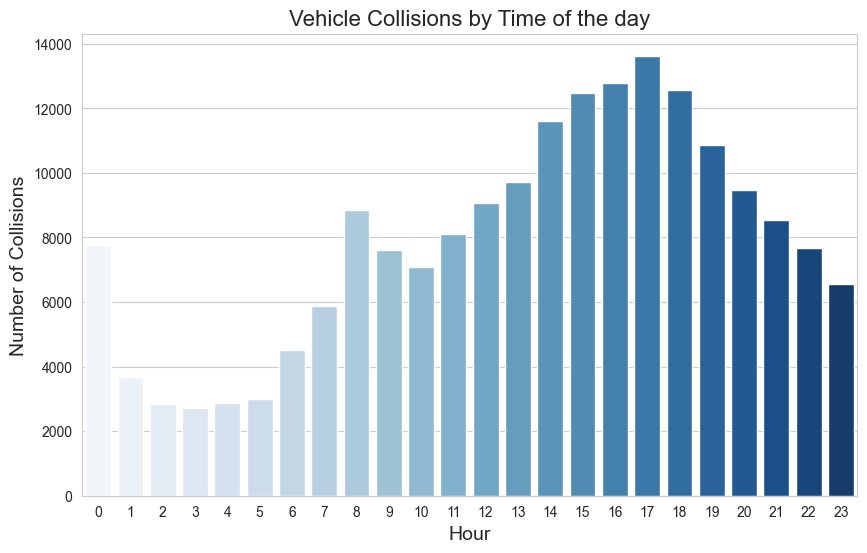

In [89]:
# To convert the CRASH TIME column to datetime object
crash_time = pd.to_datetime(cleaned_final_df['CRASH TIME'], format='%H:%M')

# To group by hour and count number of collisions
hourly_counts = cleaned_final_df.groupby(crash_time.dt.hour).size().reset_index(name='count')

# To create the figure and axis objects
fig, ax = plt.subplots(figsize=(10,6))

# To create a bar chart of the hourly counts with gradient color fill
sns.barplot(x='CRASH TIME', y='count', data=hourly_counts, ax=ax, palette='Blues')

# To set the chart title and axis labels with increased font size
ax.set_title('Vehicle Collisions by Time of the day', fontsize=16)
ax.set_xlabel('Hour', fontsize=14)
ax.set_ylabel('Number of Collisions', fontsize=14)

# To display the chart
plt.show()
fig.savefig("collisions_by_hour.png", dpi=100, bbox_inches='tight')

The  bar chart displaying the number of vehicle collisions by the time of day. It shows that the highest number of collisions occur during the afternoon, peaking around 5 pm, while the lowest number of collisions take place around 3 am.

This visualization helps to understand the pattern of collisions throughout the day and identify periods of increased risk.

## Bar Chart _ Vehicle Collisions by Weekday in NYC

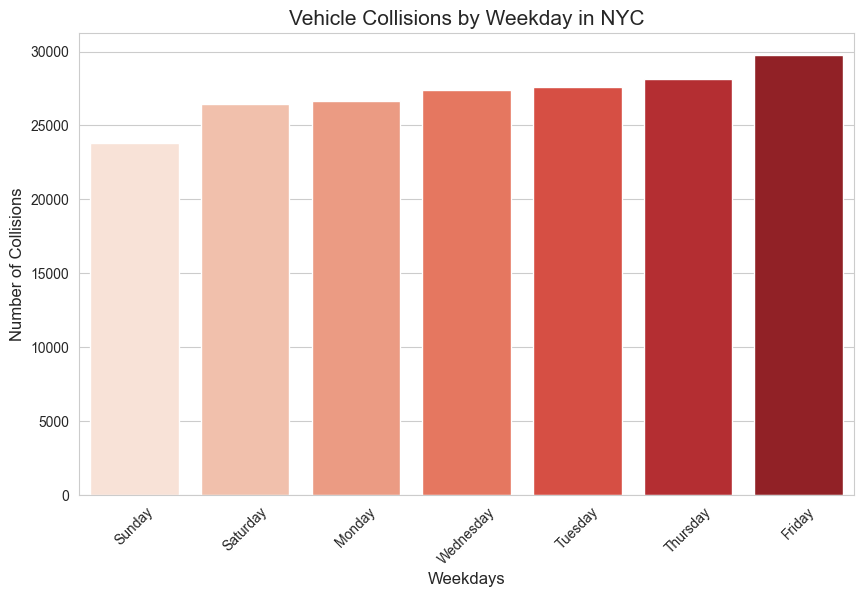

In [90]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10,6))

# count of the number of collisions by weekday 
weekday_counts = cleaned_final_df['WEEKDAY'].value_counts().sort_values(ascending=True)

# A bar chart of the weekday counts
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=ax, palette=sns.color_palette("Reds", n_colors=len(weekday_counts)))

# Setting the chart title and axis labels
ax.set_title('Vehicle Collisions by Weekday in NYC', fontsize=15)
ax.set_xlabel('Weekdays', fontsize=12)
ax.set_ylabel('Number of Collisions', fontsize=12)

plt.xticks(rotation=45)

# To display the chart
plt.show()

The bar chart displaying the number of vehicle collisions by weekdays in New York City. It shows that collisions peak on Fridays and decrease on Sundays.

This visualization helps to understand the pattern of collisions throughout the week and identify periods of increased risk.

## Bar Chart  _ Contributing factors

In [91]:
# Looking at all the unique values
joined_df_Boroughupdated['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Unspecified', 'Reaction to Uninvolved Vehicle',
       'Steering Failure', 'Other Vehicular',
       'Passing or Lane Usage Improper', 'Driver Inattention/Distraction',
       'Traffic Control Disregarded', 'View Obstructed/Limited',
       'Failure to Yield Right-of-Way', 'Alcohol Involvement',
       'Following Too Closely', 'Lost Consciousness', 'Unsafe Speed', nan,
       'Aggressive Driving/Road Rage', 'Passing Too Closely',
       'Passenger Distraction', 'Backing Unsafely', 'Turning Improperly',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Driver Inexperience', 'Tinted Windows', 'Unsafe Lane Changing',
       'Brakes Defective', 'Drugs (illegal)', 'Pavement Slippery',
       'Pavement Defective', 'Illnes', 'Fell Asleep',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',
       'Headlights Defective', 'Animals Action', 'Oversized Vehicle',
       'Outside Car Distraction', 'Accelerator Defective',
       'Obstruction/Debris', 'Physical Disabi

In [92]:
Category = {
    'Driver Error': ['Driver Inattention/Distraction', 'Following Too Closely', 'Lost Consciousness', 'Unsafe Speed', 'Aggressive Driving/Road Rage', 'Passing Too Closely', 'Backing Unsafely', 'Turning Improperly', 'Driver Inexperience', 'Unsafe Lane Changing', 'Failure to Keep Right', 'Using On Board Navigation Device', 'Cell Phone (hand-Held)', 'Listening/Using Headphones', 'Eating or Drinking', 'Texting', 'Passing or Lane Usage Improper','Failure to Yield Right-of-Way', 'Fell Asleep', 'Cell Phone (hands-free)'],
    'Vehicle Related': ['Reaction to Uninvolved Vehicle', 'Steering Failure', 'Other Vehicular', 'Tire Failure/Inadequate', 'Brakes Defective', 'Oversized Vehicle', 'Accelerator Defective', 'Other Lighting Defects', 'Tow Hitch Defective', 'Tinted Windows'],
    'Pedestrian/Bicyclist Error': ['Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'],
    'Environmental': ['View Obstructed/Limited', 'Pavement Slippery', 'Pavement Defective', 'Glare', 'Windshield Inadequate', 'Animals Action', 'Obstruction/Debris', 'Passenger Distraction', 'Outside Car Distraction'],
    'Roadway Design': ['Traffic Control Disregarded', 'Lane Marking Improper/Inadequate', 'Traffic Control Device Improper/Non-Working'],
    'Medical Issue': ['Illnes', 'Fatigued/Drowsy', 'Headlights Defective' , 'Physical Disability', 'Prescription Medication', 'Shoulders Defective/Improper'],
    'Alcohol/Drug Related': ['Alcohol Involvement', 'Drugs (illegal)'],
    'Other': ['Unspecified', 'Driverless/Runaway Vehicle', 'Other Electronic Device', 'Vehicle Vandalism']
}

# Create a new column with the category name
joined_df_Boroughupdated['Category'] = joined_df_Boroughupdated['CONTRIBUTING FACTOR VEHICLE 1'].map({value: key for key, values in Category.items() for value in values})

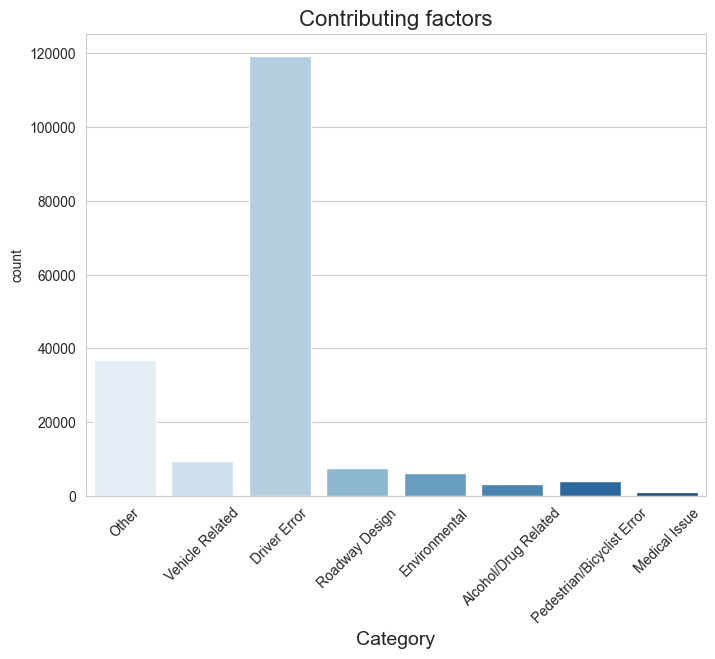

In [93]:
# Create the figure and axis objects

fig, ax = plt.subplots(figsize=(8,6))

# Create a countplot of the Category column
sns.countplot(data=joined_df_Boroughupdated, x='Category', palette='Blues')

# To set the chart title and axis labels with increased font size
ax.set_title('Contributing factors', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
plt.xticks(rotation=45)


# To display the chart
plt.show()

The above bar chart displaying the number of collisions based on different contributing factors. It shows that the majority of collisions are caused by driver error, followed by other factors, with the least number of collisions due to medical issues.

This visualization helps to understand the primary causes of vehicle collisions and can be useful for creating targeted interventions to reduce the risk of future accidents.

## Pie Chart _ Vehicle Collisions by Borough in NYC

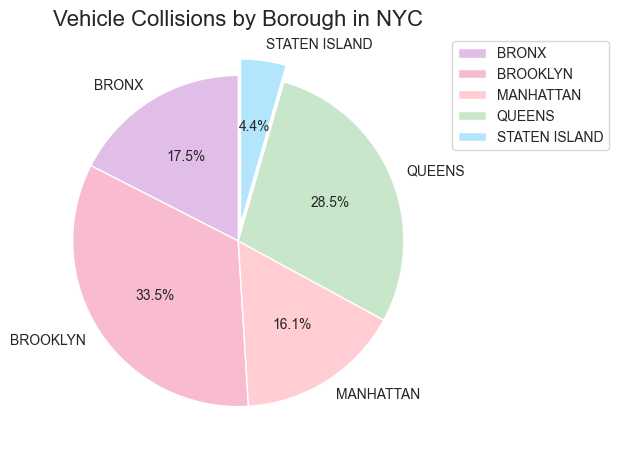

In [94]:
# Define the data
counts_by_borough = joined_df_Boroughupdated.groupby('FINAL_BOROUGH').size()

# Define the color scheme
colors = ['#E1BEE7', '#F8BBD0', '#FFCDD2', '#C8E6C9', '#B3E5FC']

# Define the explode values
explode = (0, 0, 0, 0, 0.1)

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts_by_borough.values, labels=counts_by_borough.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Add a title
ax.set_title('Vehicle Collisions by Borough in NYC', fontsize= 16)

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust the position of the pie chart
fig.subplots_adjust(top=0.8)

plt.show()

The pie chart displaying the proportion of vehicle collisions by borough in New York City. It shows that Staten Island has the lowest rate of collisions, accounting for only 4.4% of the total, while Brooklyn has the highest rate, accounting for 33.5% of the total collisions.

This visualization helps to understand the distribution of vehicle collisions across different boroughs in New York City and can be useful for prioritizing safety measures and resource allocation to address the issue.

## Top 10 Vehicle Types Involved in Accidents

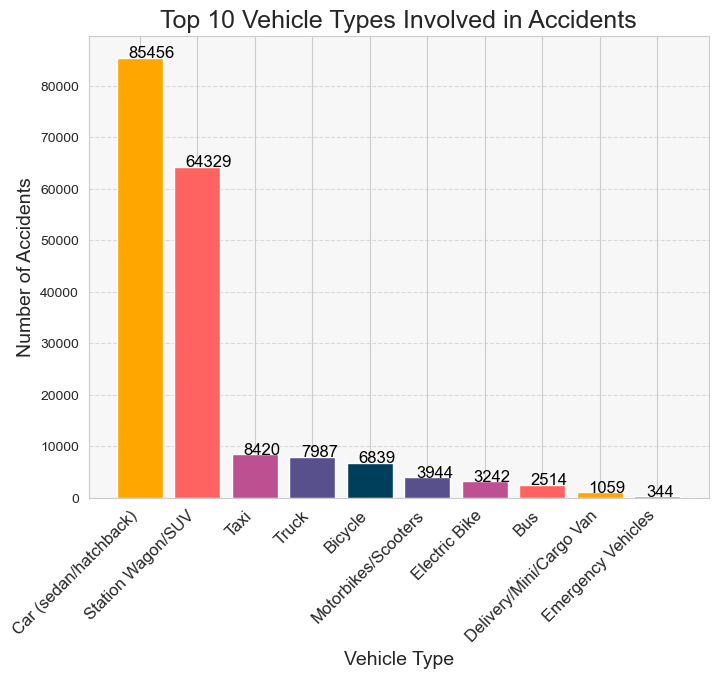

In [43]:
# Group by the field 'Vehicle Group' and get the count
vehicle_counts = cleaned_final_df.groupby('Vehicle Group').size().reset_index(name='counts')

# sort by count in descending order and get the top 10
top_10_vehicle_counts = vehicle_counts.sort_values('counts', ascending=False).head(10)

# define a list of colors for each bar
color_list = ['#ffa600', '#ff6361', '#bc5090', '#58508d', '#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#ff6361']

# plot the top 10 vehicle types involved in accidents
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(top_10_vehicle_counts['Vehicle Group'], top_10_vehicle_counts['counts'], color=color_list)
ax.set_title('Top 10 Vehicle Types Involved in Accidents', fontsize=18)
ax.set_xlabel('Vehicle Type', fontsize=14)
ax.set_ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
ax.set_facecolor('#f7f7f7')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+0.5, str(i.get_height()), fontsize=12, color='black')
plt.show()

The graph above depicts the top 10 vehicle types involved in accidents in New York City. It shows that cars (sedan/hatchback) have the highest number of collisions with 85.456, followed by station wagons/SUVs with 64.329, and emergency vehicles having the fewest collisions with 344.

This visualization helps to understand which vehicle types are most commonly involved in accidents in New York City. This information can be useful for policymakers, insurance companies, and city planners to better understand the relationship between vehicle types and collisions and help inform targeted safety measures.

## Pie Charts _ Injuries/Deaths by Borough 

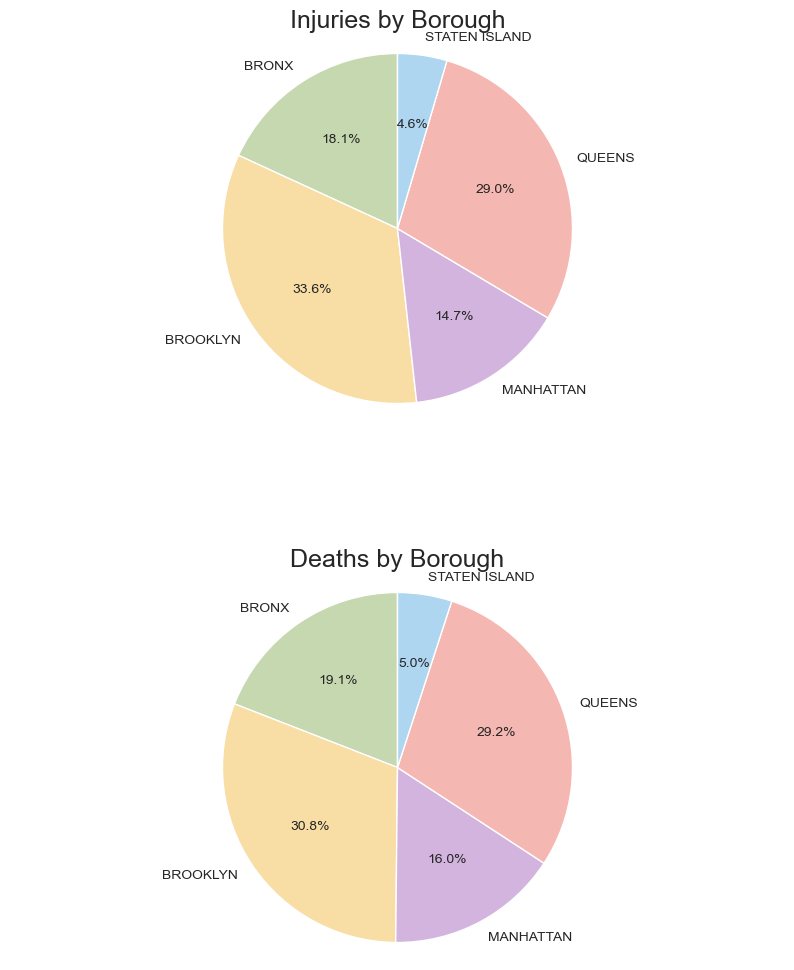

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define a custom color palette
colors = ['#C6D8AF', '#F8DDA4', '#D2B4DE', '#F5B7B1', '#AED6F1', '#E6B0AA', '#D7BDE2']

# Select the required columns
df_injured = cleaned_final_df[['FINAL_BOROUGH', 'NUMBER OF PERSONS INJURED']]
df_killed = cleaned_final_df[['FINAL_BOROUGH', 'NUMBER OF PERSONS KILLED']]

# group by borough and sum the injuries and deaths
borough_stats_injured = df_injured.groupby('FINAL_BOROUGH').sum()
borough_stats_killed = df_killed.groupby('FINAL_BOROUGH').sum()

# create pie charts for injuries and deaths
fig, axs = plt.subplots(2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4)

axs[0].pie(borough_stats_injured['NUMBER OF PERSONS INJURED'], 
           labels=borough_stats_injured.index, 
           autopct='%1.1f%%', 
           startangle=90,
           colors=colors)
axs[0].axis('equal')
axs[0].set_title('Injuries by Borough', fontsize=18)

axs[1].pie(borough_stats_killed['NUMBER OF PERSONS KILLED'], 
           labels=borough_stats_killed.index, 
           autopct='%1.1f%%', 
           startangle=90,
           colors=colors)
axs[1].axis('equal')
axs[1].set_title('Deaths by Borough', fontsize=18)

plt.show()


These two pie charts displaying the distribution of injuries and deaths resulting from vehicle collisions across different boroughs in New York City. Both pie charts show that Brooklyn has the highest number of injuries (33.6%) and deaths (30.8%), while Staten Island has the lowest number of injuries (4.6%) and deaths (5.0%).

These visualizations provide valuable insights into the distribution of injuries and deaths resulting from vehicle collisions in different boroughs of New York City. Policymakers, city planners, and healthcare providers can use this information to develop targeted interventions and allocate resources more effectively to reduce the impact of vehicle collisions on public health and safety.

# 4. Genre 

The genre of our data story adopts a magazine-style approach. This genre enables us to convey a coherent narrative that aligns with our intentions.

Visual Narrative:
Here, we discuss the tools we've used from the three categories of Visual Narrative (as outlined in Segal and Heer's Figure 7).

1. Visual Structuring:
Our visualizations (barcharts and piecharts) maintain a consistent layout throughout the article, providing a coherent visual platform. This consistency allows users to easily familiarize themselves with the interactive elements of the plots.


2. Transition Guidance:
In the maps, readers transition between different visualizations using the layer control in the upper right corner. These transitions maintain object continuity, as the map and municipal geometry remain consistent while colors/values change.

Narrative Structure:
Lastly, we address the three categories of Narrative Structure.

1. Ordering:
Our story follows an article format with linear ordering, guiding readers through the narrative in a specific sequence. This linear structure is appropriate for the story we aim to tell.

2. Messaging:
Our story relies heavily on messaging through an accompanying article that includes headlines, introductory text, and a summary. We employ multi-messaging by using barcharts and piecharts to convey the same information in two different ways, reinforcing our message. Comment repetition is utilized in the final section to emphasize key learnings and provide a comprehensive conclusion to the story.

# 5. Visualizations

##### Explainations of the visualizations we've chosen

Accident rates in NYC remain relatively stable throughout the weekdays, but there is a noticeable increase on Fridays before declining again on Sundays. The most collisions in NYC occur at 5:00 PM, while the fewest happen at 3:00 AM. Collision rates start to rise gradually around 6:00 AM and peak at 8:00 AM during the morning rush hour. The highest number of collisions is observed during the late afternoon, and the rates gradually decrease as the day progresses towards the evening.

Driver error is one of the major factors contributing to accidents, and our observations showed that the highest number of collisions occurred in Brooklyn.

Cars, particularly sedans and hatchbacks, are the most common vehicles involved in collisions.

In terms of injuries resulting from collisions, Brooklyn has the highest number (33.6%), followed by Queens (29%) and the Bronx (18.1%). This suggests that more focus should be placed on improving road safety measures in these areas.

Brooklyn also has the highest number of deaths (30.8%) due to motor vehicle collisions. In contrast, Staten Island has the lowest number of deaths (5.0%).


##### Why are they right for the story we want to tell?

The insights provided are right for the story because they highlight key aspects of motor vehicle collisions in NYC and inform the audience about the most affected areas and times. These insights can help policymakers and city planners to prioritize resources and focus on implementing effective road safety measures. Here's a summary of why these insights are relevant:

1. Identifying the trend of collisions on weekdays and the peak time of accidents (5:00 PM) can help authorities allocate appropriate resources and increase police presence during these periods to reduce accident rates.
2. Understanding that driver error is a significant contributing factor to collisions emphasizes the need for better driver education and stricter enforcement of traffic laws.
3. Knowing that the majority of collisions involve cars, specifically sedans and hatchbacks, could inform the development of targeted safety campaigns or vehicle design improvements that focus on these types of vehicles.
4. The fact that Brooklyn experiences the highest number of injuries and deaths related to collisions suggests that more resources and attention should be directed to this borough to improve road safety. This information can also help authorities identify potential hotspots for accidents and implement necessary interventions.
5. By understanding the distribution of injuries and deaths across the boroughs, policymakers can make more informed decisions about allocating resources for road safety improvements, public awareness campaigns, and emergency response services.

These insights collectively tell a comprehensive story about motor vehicle collisions in NYC, providing valuable information to improve road safety and save lives.

# 6. Discussion 
##### What went well?

1. Data cleaning and preprocessing: The dataset was cleaned effectively by handling missing values, filtering out irrelevant rows, and merging external information when necessary. This ensured a reliable and accurate analysis of the data.
2. Visualizations: The use of different types of charts, such as bar charts and pie charts, allowed for a better understanding of various aspects of motor vehicle collisions in NYC. These visualizations made it easier to identify trends and patterns.
3. Insights generation: The analysis provided a comprehensive overview of motor vehicle collisions in NYC, highlighting crucial aspects like the peak hours, weekdays with the highest collision rates, contributing factors, and borough-specific details. These insights help inform recommendations for improving road safety.

##### What is still missing? What could be improved? Why?

1. Granular analysis: While the analysis provided a general overview of motor vehicle collisions in NYC, a more granular approach could be taken to identify specific streets or intersections with higher collision rates. This would help target interventions more effectively.
2. Temporal analysis: The analysis could be expanded to include a yearly or monthly breakdown of collision trends to identify any seasonality or changes over time. This information would be useful in understanding the impact of any interventions or changes in traffic patterns on collision rates.
3. External factors: The analysis could benefit from incorporating additional external factors, such as weather conditions, road conditions, or construction activities, which might contribute to collisions. This information would help identify other areas of focus for improving road safety.
4. Demographic information: Including demographic information about the drivers involved in collisions, such as age, gender, or driving experience, could provide insights into which groups may be more prone to accidents. This information could be used to tailor educational campaigns or other interventions.
5. Evaluation of interventions: If data on past interventions and their impact on collision rates is available, it would be valuable to assess the effectiveness of these measures. This information would help inform future policy decisions and resource allocation for road safety improvements.



# 7. Contributions

Here is an overview of who was main responsible for which parts of the project:
- Website: ()
- Article: ()
- Explainer notebook: ()
- Data preprocessing: ()
- Exploratory data analysis: ()
- Data visualizations: ()

# 8. References

1. Dataset

2. GitHub
